<a href="https://colab.research.google.com/github/aakashkumarme/DeepLearning_/blob/main/Insurance_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv");
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#convert categorical and non numerical data in numnerical
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
X = insurance_one_hot.drop("charges" , axis = 1)
y = insurance_one_hot["charges"]

X.head(),y.head()

(   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
 0   19  27.900         0  ...                 0                 0                 1
 1   18  33.770         1  ...                 0                 1                 0
 2   28  33.000         3  ...                 0                 1                 0
 3   33  22.705         0  ...                 1                 0                 0
 4   32  28.880         0  ...                 1                 0                 0
 
 [5 rows x 11 columns], 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

In [20]:
import tensorflow as tf
tf.random.set_seed(42)
#Create a model.
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                      )
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10200.7270 - mae: 10200.7270
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7718.1919 - mae: 7718.1919
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 6983.7824 - mae: 6983.7824
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 8083.4829 - mae: 8083.4829
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7793.8446 - mae: 7793.8446
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7618.4107 - mae: 7618.4107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7678.4977 - mae: 7678.4977
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7780.4291 - mae: 7780.4291
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7588.8130 - mae: 7588.8130
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7520.6838 - mae: 7520.68

In [21]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

###MAE is very bad , so we need to improve it

In [42]:
insurance_model2 = tf.keras.Sequential([
                                       #tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])
insurance_model2.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=["mae"]
                      )
history = insurance_model2.fit(X_train,y_train,epochs=500,verbose=1)

Epoch 1/500
34/34 [==============================] - 0s 1ms/step - loss: 13276.7189 - mae: 13276.7189
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 12923.0941 - mae: 12923.0941
Epoch 3/500
34/34 [==============================] - 0s 1ms/step - loss: 12682.3555 - mae: 12682.3555
Epoch 4/500
34/34 [==============================] - 0s 1ms/step - loss: 13366.1636 - mae: 13366.1636
Epoch 5/500
34/34 [==============================] - 0s 1ms/step - loss: 13274.7036 - mae: 13274.7036
Epoch 6/500
34/34 [==============================] - 0s 1ms/step - loss: 13126.4257 - mae: 13126.4257
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 13143.2878 - mae: 13143.2878
Epoch 8/500
34/34 [==============================] - 0s 1ms/step - loss: 13467.7342 - mae: 13467.7342
Epoch 9/500
34/34 [==============================] - 0s 1ms/step - loss: 13236.3935 - mae: 13236.3935
Epoch 10/500
34/34 [==============================] - 0s 2ms/step - loss: 13376.83

In [43]:
insurance_model2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 6242.6978 - mae: 6242.6978


[6242.69775390625, 6242.69775390625]

Text(0.5, 0, 'epoch')

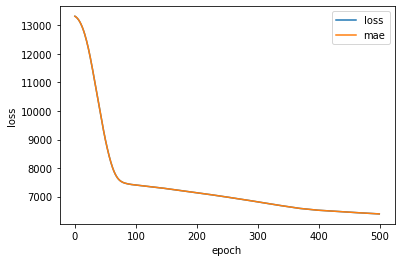

In [44]:
#loss curve / training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epoch")